In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
import sys
sys.path.append('/home/tomek/ib_tools')
from blotter import MongoBlotter
%matplotlib inline

In [2]:
cash = 109394
df = MongoBlotter().read()
df.tail(30)

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
1337,6010864be903b5140f89c10c,2021-01-26 22:14:51.191,2021-01-26 21:14:51.110,NQH1,SELL,1.0,13569.000000,[0000e1a7.601019a0.01.01],362,1825541475,STOP-LOSS,2.10,920.80
1338,6010864ce903b5140f89c10d,2021-01-26 22:14:52.129,2021-01-26 21:14:52.122,MNQH1,SELL,3.0,13563.500000,"[0000e1a7.601019a3.01.01, 0000e1a7.601019a4.01...",364,1825541477,STOP-LOSS,1.41,235.68
1339,6010f214e903b5140f89c222,2021-01-27 05:54:44.997,2021-01-27 04:54:44.991,MESH1,SELL,9.0,3834.666667,"[0000e1a7.6010ad30.01.01, 0000e1a7.6010ad31.01...",340,1138731043,STOP-LOSS,4.23,-765.96
1340,6010f215e903b5140f89c223,2021-01-27 05:54:45.188,2021-01-27 04:54:45.099,ESH1,SELL,1.0,3835.250000,[0000e1a7.6010ad38.01.01],342,1138731045,STOP-LOSS,2.10,-816.70
1341,6011640de903b5140f89c34a,2021-01-27 14:01:01.540,2021-01-27 13:01:01.496,YM MAR 21,SELL,2.0,30468.000000,"[0000e1a7.6010e10e.01.01, 0000e1a7.6010e10f.01...",338,255788591,ENTRY,4.20,0.00
1342,60116fe7e903b5140f89c369,2021-01-27 14:51:35.839,2021-01-27 13:51:35.822,NQH1,SELL,1.0,13385.250000,[0000e1a7.6010eb3d.01.01],341,255788600,ENTRY,2.10,0.00
1343,60116fe7e903b5140f89c36a,2021-01-27 14:51:35.840,2021-01-27 13:51:35.831,MNQH1,SELL,1.0,13385.250000,[0000e1a7.6010eb3e.01.01],342,255788603,ENTRY,0.47,0.00
1344,601179a5e903b5140f89c383,2021-01-27 15:33:09.595,2021-01-27 14:33:09.550,NQH1,BUY,1.0,13292.000000,[0000e1a7.6010faeb.01.01],343,255788604,STOP-LOSS,2.10,1860.80
1345,601179a5e903b5140f89c384,2021-01-27 15:33:09.699,2021-01-27 14:33:09.575,MNQH1,BUY,1.0,13292.500000,[0000e1a7.6010faec.01.01],345,255788606,STOP-LOSS,0.47,184.56
1346,601179bce903b5140f89c385,2021-01-27 15:33:32.301,2021-01-27 14:33:32.289,NQH1,SELL,1.0,13290.500000,[0000e1a7.6010fb9a.01.01],347,255788614,ENTRY,2.10,0.00


In [3]:
df[df.realizedPNL>0].realizedPNL.count()

245

In [4]:
#del df['sys_time']
del df['exec_ids']
del df['perm_id']
del df['_id']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])
micro_contracts = df[df.contract.str.startswith('M')]
macro_contracts = df[~df.contract.str.startswith('M')]
micro_contracts['amount'] /= 10
df = pd.concat([macro_contracts, micro_contracts]).sort_index()
df.contract = df.contract.str.strip('M')
df['contract'] = df['contract'].apply(lambda x: x[:2])
df.contract = df.contract.str.strip()

In [5]:
c = set(df['contract'])
allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
#allocs = pd.Series([1/3, 2/3, 1], index=['ES','NQ', 'total'])
allocs = pd.Series([.4, .125, .225, .25, 1], index=['NQ','ES', 'GC', 'YM', 'total'])

In [6]:
allocs

NQ       0.400
ES       0.125
GC       0.225
YM       0.250
total    1.000
dtype: float64

In [7]:
df.groupby('contract').realizedPNL.sum()

contract
ES      929.140000
GC    -1832.979999
NQ    16671.660008
YM    -4222.440001
Name: realizedPNL, dtype: float64

In [8]:
df.realizedPNL.sum()

11545.380007999993

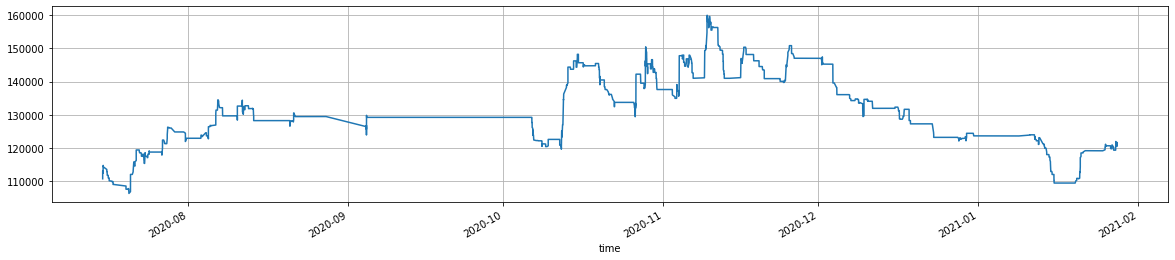

In [9]:
df.cash.plot(figsize=(20,4), grid=True);

In [10]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [11]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES    146
 GC    238
 NQ    808
 YM    175
 Name: action, dtype: int64,
 1367)

In [12]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES    1.035461
 GC    1.687943
 NQ    5.730496
 YM    1.241135
 Name: action, dtype: float64,
 9.695035460992909)

In [13]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES     409.43
GC     660.65
NQ    2204.51
YM     529.43
Name: commission, dtype: float64

In [14]:
df.commission.sum()

3804.0199999999995

In [15]:
# per trade stats (pro rated per macro contract)
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss', 
                                'win_ratio', 'EV/contract', 'number_of_contracts'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    d['pnl_per_contract'] = d.realizedPNL / d.amount
    row['average_PNL'] = round(d['pnl_per_contract'].mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0])['pnl_per_contract'].mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0])['pnl_per_contract'].mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV/contract'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_contracts'] = d.amount.sum()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV/contract,number_of_contracts
YM,0.34,6.75,1190.49,-595.15,2.00,11.97,103.1
NQ,0.38,33.02,931.56,-522.70,1.78,29.92,423.1
ES,0.32,168.16,1771.60,-600.15,2.95,158.81,65.9
GC,0.33,9.26,1226.36,-591.38,2.07,8.47,104.3
total,0.36,39.70,1087.85,-553.37,1.97,37.47,696.4


In [16]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [17]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,GC,NQ,YM,total
ES,1.000000,0.049641,0.110990,0.303726,0.466445
GC,0.049641,1.000000,-0.039472,0.010801,0.272542
NQ,0.110990,-0.039472,1.000000,0.300914,0.822786
YM,0.303726,0.010801,0.300914,1.000000,0.637409
total,0.466445,0.272542,0.822786,0.637409,1.000000


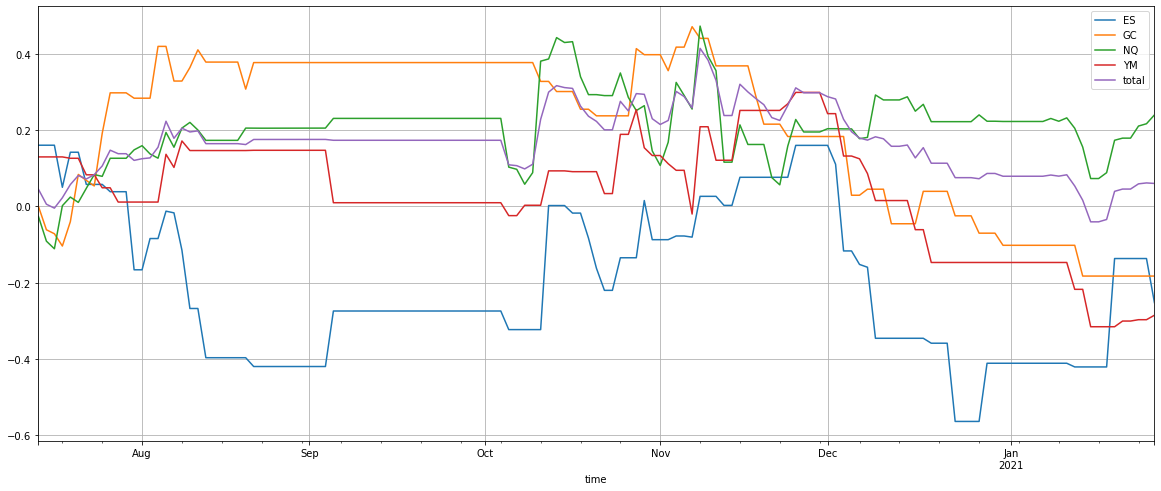

In [18]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

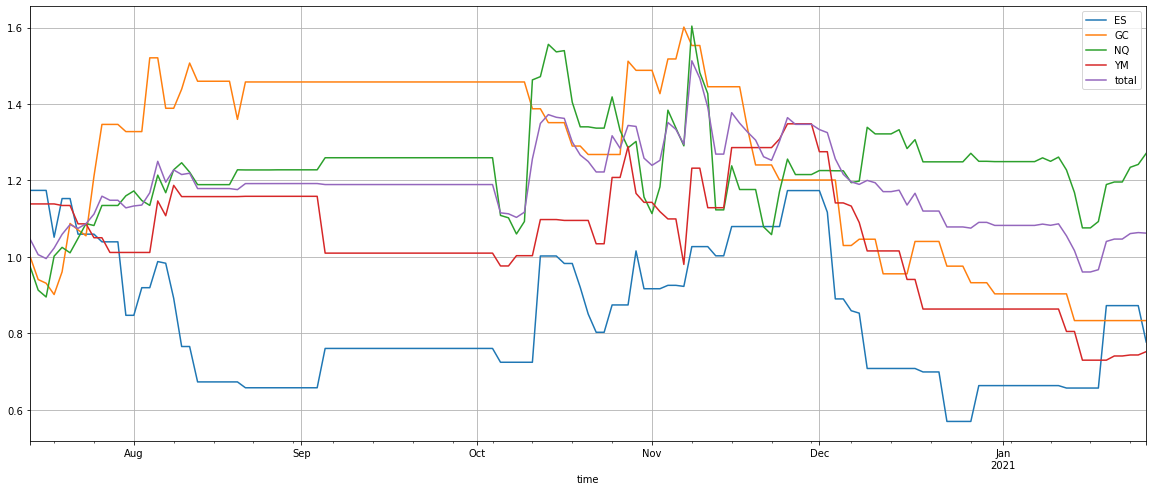

In [19]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [20]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,GC,NQ,YM,total
Annual return,-0.362671,-0.278186,0.534774,-0.399132,0.113622
Cumulative returns,-0.222793,-0.166730,0.270856,-0.247993,0.062065
Annual volatility,1.090886,0.632282,0.877288,0.700355,0.505998
Sharpe ratio,0.100510,-0.210500,0.900447,-0.393997,0.456040
Calmar ratio,-0.704284,-0.580046,1.571885,-0.870092,0.311120
Stability,0.051209,0.394712,0.083822,0.263098,0.011931
Max drawdown,-0.514949,-0.479592,-0.340212,-0.458724,-0.365205
Omega ratio,1.031644,0.940344,1.263200,0.883868,1.109718
Sortino ratio,0.166826,-0.343591,1.623227,-0.648575,0.806940
Skew,1.715234,1.394957,1.952238,1.904589,1.645770


In [21]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,GC,NQ,YM,total
time,,,,,
2020-07-31,-15.29,32.77,15.97,1.15,12.82
2020-08-31,-22.38,9.78,5.87,14.52,5.64
2020-09-30,15.65,0.00,2.57,-12.83,-0.22
2020-10-31,20.54,2.09,-8.16,13.16,5.81
2020-11-30,28.02,-19.29,5.08,17.98,7.03
2020-12-31,-43.49,-24.80,2.79,-35.95,-19.63
2021-01-31,17.20,-7.74,1.73,-12.91,-1.87


In [22]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES      -22.0
GC      -17.0
NQ       27.0
YM      -25.0
total     6.0
dtype: float64

In [23]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2020-11-04 03:14:38.840,NQ,SELL,11651.500000,11506.6
2020-11-09 01:36:53.379,NQ,SELL,12311.000000,8236.6
2020-11-16 01:46:56.858,NQ,SELL,12030.000000,5747.4
2020-07-20 22:44:06.883,NQ,SELL,10934.000000,5180.8
2020-10-12 08:41:25.532,NQ,SELL,11849.250000,5112.4
...,...,...,...,...
2020-11-20 14:00:34.667,NQ,SELL,11976.416667,-2492.6
2020-12-23 08:10:23.087,ES,BUY,3685.750000,-2533.4
2021-01-15 00:39:31.173,YM,SELL,30860.000000,-2552.6


In [24]:
daily.sort_values('total', ascending=False)

,ES,GC,NQ,YM,total
time,,,,,
2020-11-09,0.112801,-0.030102,0.242791,0.256893,0.168667
2020-10-12,0.000000,-0.048118,0.339078,0.000000,0.124805
2020-11-16,0.076374,0.000000,0.102596,0.139371,0.085428
2020-11-04,0.009712,0.063649,0.169632,-0.017112,0.079110
2020-10-26,0.089103,0.000000,0.061112,0.167803,0.077534
...,...,...,...,...,...
2020-12-03,-0.203049,0.000000,-0.000472,-0.105058,-0.051834
2021-01-15,0.000000,0.000000,-0.079183,-0.093336,-0.055007
2020-10-30,-0.097425,0.000000,-0.111733,-0.020080,-0.061892
